In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/CarPrice_Assignment.csv"
data = pd.read_csv(url)

In [3]:
print(data.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [4]:
X = data[['enginesize']]  
y = data['price']         

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred_linear = linear_model.predict(X_test)

In [9]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression MSE:", mse_linear)
print("Linear Regression R^2 score:", r2_linear)

Linear Regression MSE: 15465458.96590847
Linear Regression R^2 score: 0.8040958796678975


In [10]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [11]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [12]:
y_pred_poly = poly_model.predict(X_test_poly)

In [13]:
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("Polynomial Regression MSE:", mse_poly)
print("Polynomial Regression R^2 score:", r2_poly)

Polynomial Regression MSE: 15637882.192006014
Polynomial Regression R^2 score: 0.8019117595258491


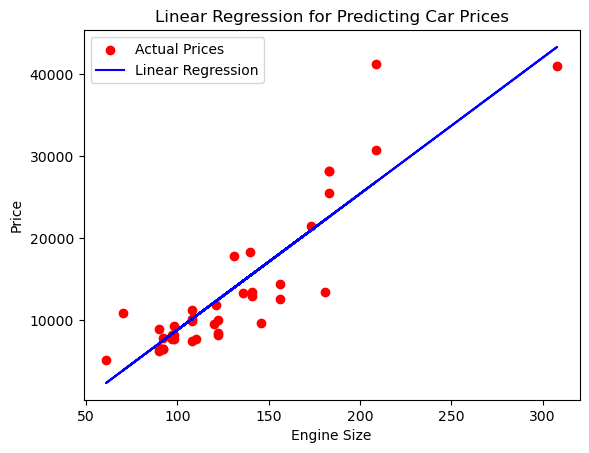

In [14]:
plt.scatter(X_test, y_test, color='red', label='Actual Prices')
plt.plot(X_test, y_pred_linear, color='blue', label='Linear Regression')
plt.title('Linear Regression for Predicting Car Prices')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend()
plt.show()

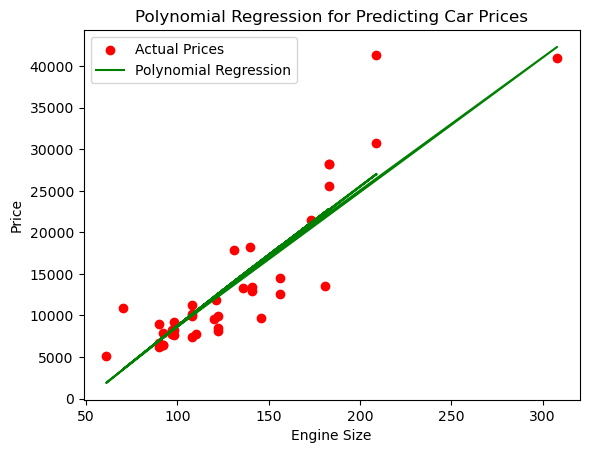

In [15]:
plt.scatter(X_test, y_test, color='red', label='Actual Prices')
plt.plot(X_test, y_pred_poly, color='green', label='Polynomial Regression')
plt.title('Polynomial Regression for Predicting Car Prices')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend()
plt.show()